In [1]:
#importing the essential libraries
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans 
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
#importing the dataset
dataset =pd.read_excel('cleaned_labelled_final.xlsx')

In [3]:
#concatinating id and trial count as key
dataset['key'] = dataset['Id'] + '_' +dataset['Trail_Count'].apply(str)

In [4]:
dataset.key

0       02s1r00001acKkkAAE_1
1       02s1r00001acKkkAAE_2
2       02s1r00001blgJyAAI_1
3       02s1r00001blgJyAAI_2
4       02s1r00001blgcRAAQ_1
5       02s1r00001blgcRAAQ_2
6       02s1r00001blgcRAAQ_3
7       02s1r00001blgcRAAQ_4
8       02s1r00001blj0aAAA_2
9       02s1r00001blj6TAAQ_2
10      02s1r00001blj6TAAQ_3
11      02s1r00001blwqoAAA_1
12      02s1r00001blwqoAAA_2
13      02s1r00001blz0lAAA_2
14      02s1r00001bm0GBAAY_2
15      02s1r00001bm0GBAAY_3
16      02s1r00001bm1QWAAY_2
17      02s1r00001bm1QWAAY_3
18      02s1r00001bm2gQAAQ_2
19      02s1r00001bm2hiAAA_1
20      02s1r00001bm43aAAA_1
21      02s1r00001bm43aAAA_2
22      02s1r00001bm43aAAA_4
23      02s1r00001bm43aAAA_5
24      02s1r00001bm4yMAAQ_2
25      02s1r00001bm4yMAAQ_3
26      02s1r00001bm4yMAAQ_4
27      02s1r00001bm5uuAAA_1
28      02s1r00001bmBRoAAM_1
29      02s1r00001bmBRoAAM_2
                ...         
7059    02s1r00001ft4toAAA_3
7060    02s1r00001ft4toAAA_4
7061    02s1r00001ft4uDAAQ_1
7062    02s1r0

In [5]:
dataset

,Id,Subject,HtmlBody,HtmlBody (Cleaned Data),Trail_Count,Category,Manual Label,key
0,02s1r00001acKkkAAE,FW: Payment Query,"Good Morning, Please could I have a response t...","good morning, please could i have a response t...",1,0,Escalation,02s1r00001acKkkAAE_1
1,02s1r00001acKkkAAE,FW: Payment Query,"Payment Query Good Morning, Thank you for your...","payment query good morning, thank you for your...",2,0,Others,02s1r00001acKkkAAE_2
2,02s1r00001blgJyAAI,FW: STATEMENT & QUERIES,Please find attached copy of statement/queries...,please find attached copy of statement/queries...,1,Vendor Statement Status,Others,02s1r00001blgJyAAI_1
3,02s1r00001blgJyAAI,FW: STATEMENT & QUERIES,STATEMENT & QUERIES Please find attached up to...,statement & queries please find attached up to...,2,Vendor Statement Status,Status,02s1r00001blgJyAAI_2
4,02s1r00001blgcRAAQ,FW: Statement from Oasis Products Vending Serv...,Statement from Oasis Products Vending Services...,statement from oasis products vending services...,1,Invoice Status,Others,02s1r00001blgcRAAQ_1
5,02s1r00001blgcRAAQ,FW: Statement from Oasis Products Vending Serv...,FW: Statement from Oasis Products Vending Serv...,statement from oasis products vending service...,2,Invoice Status,Others,02s1r00001blgcRAAQ_2
6,02s1r00001blgcRAAQ,FW: Statement from Oasis Products Vending Serv...,FW: Statement from Oasis Products Vending Serv...,statement from oasis products vending service...,3,Invoice Status,Others,02s1r00001blgcRAAQ_3
7,02s1r00001blgcRAAQ,FW: Statement from Oasis Products Vending Serv...,Statement from Oasis Products Vending Services...,statement from oasis products vending services...,4,Invoice Status,Others,02s1r00001blgcRAAQ_4
8,02s1r00001blj0aAAA,EES UK CIS deductions,"EES UK CIS deductions Hi, After speaking to Sh...","ees uk cis deductions hi, after speaking to sh...",2,0,Others,02s1r00001blj0aAAA_2
9,02s1r00001blj6TAAQ,FW: Securitas Invoice Processed Twice In Error,FW: Securitas Invoice Processed Twice In Error...,securitas invoice processed twice in error hi...,2,0,Others,02s1r00001blj6TAAQ_2


In [6]:
ds = dataset[['Id','HtmlBody (Cleaned Data)','Trail_Count','key']]

In [7]:
ds

,Id,HtmlBody (Cleaned Data),Trail_Count,key
0,02s1r00001acKkkAAE,"good morning, please could i have a response t...",1,02s1r00001acKkkAAE_1
1,02s1r00001acKkkAAE,"payment query good morning, thank you for your...",2,02s1r00001acKkkAAE_2
2,02s1r00001blgJyAAI,please find attached copy of statement/queries...,1,02s1r00001blgJyAAI_1
3,02s1r00001blgJyAAI,statement & queries please find attached up to...,2,02s1r00001blgJyAAI_2
4,02s1r00001blgcRAAQ,statement from oasis products vending services...,1,02s1r00001blgcRAAQ_1
5,02s1r00001blgcRAAQ,statement from oasis products vending service...,2,02s1r00001blgcRAAQ_2
6,02s1r00001blgcRAAQ,statement from oasis products vending service...,3,02s1r00001blgcRAAQ_3
7,02s1r00001blgcRAAQ,statement from oasis products vending services...,4,02s1r00001blgcRAAQ_4
8,02s1r00001blj0aAAA,"ees uk cis deductions hi, after speaking to sh...",2,02s1r00001blj0aAAA_2
9,02s1r00001blj6TAAQ,securitas invoice processed twice in error hi...,2,02s1r00001blj6TAAQ_2


In [8]:
from sklearn.feature_extraction.text import CountVectorizer

In [9]:
cv = CountVectorizer()

In [10]:
ds['HtmlBody (Cleaned Data)'].isnull().sum()

1

In [11]:
ds.isnull().sum()

Id                         0
HtmlBody (Cleaned Data)    1
Trail_Count                0
key                        0
dtype: int64

In [12]:
ds.dropna(inplace = True)

C:\Users\850044344\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [13]:
X = cv.fit_transform(ds['HtmlBody (Cleaned Data)'])

In [14]:
X

<7088x8282 sparse matrix of type '<class 'numpy.int64'>'
	with 244107 stored elements in Compressed Sparse Row format>

In [15]:
vect = TfidfVectorizer(stop_words='english', max_df=0.50, min_df=2)
X = vect.fit_transform(ds['HtmlBody (Cleaned Data)'])

In [16]:
ds.columns = ds.columns.str.replace(' ','_').str.lower()

In [17]:
ds.columns

Index(['id', 'htmlbody_(cleaned_data)', 'trail_count', 'key'], dtype='object')

In [18]:
import os
import sys
import numpy
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.datasets import load_files
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt



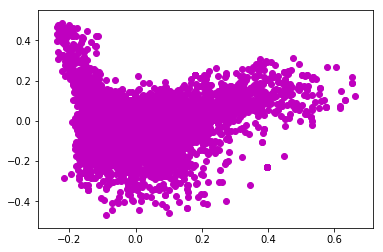

In [19]:
X_dense = X.todense()
coords = PCA(n_components=2).fit_transform(X_dense)
plt.scatter(coords[:, 0], coords[:, 1], c='m')
plt.show()

In [20]:
def top_tfidf_feats(row, features, top_n=20):
    topn_ids = np.argsort(row)[::-1][:top_n]
    top_feats = [(features[i], row[i]) for i in topn_ids]
    df = pd.DataFrame(top_feats, columns=['features', 'score'])
    return df
def top_feats_in_doc(X, features, row_id, top_n=25):
    row = np.squeeze(X[row_id].toarray())
    return top_tfidf_feats(row, features, top_n)

In [21]:
features = vect.get_feature_names()
print(top_feats_in_doc(X, features, 1, 10))

      features     score
0     ahd_date  0.325101
1     advising  0.277796
2       credit  0.274680
3      payment  0.252114
4  transaction  0.245642
5        avoid  0.232850
6      charges  0.232850
7       remain  0.227811
8       issued  0.219427
9      reverse  0.204786


In [22]:
def top_mean_feats(X, features,
grp_ids=None, min_tfidf=0.1, top_n=25):
    if grp_ids:
        D = X[grp_ids].toarray()
    else:
        D = X.toarray()
        
    D[D < min_tfidf] = 0
    tfidf_means = np.mean(D, axis=0)
    return top_tfidf_feats(tfidf_means, features, top_n)

In [23]:
print(top_mean_feats(X, features, top_n=10))

    features     score
0    invoice  0.061363
1    payment  0.036395
2   invoices  0.035646
3         hi  0.034130
4  statement  0.030689
5   attached  0.029898
6    request  0.028260
7       team  0.027579
8   ahd_date  0.026981
9     number  0.024027


In [ ]:
from sklearn.cluster import KMeans
wcss =[]
for i in range(1,20):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,20),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [ ]:
n_clusters = 10
clf = KMeans(n_clusters=n_clusters, max_iter=100, init='k-means++', n_init=1)
labels = clf.fit_predict(X)

In [ ]:
labels

In [26]:
labels.view

<function ndarray.view>

In [27]:
X

<7088x5426 sparse matrix of type '<class 'numpy.float64'>'
	with 139698 stored elements in Compressed Sparse Row format>

In [28]:
X_dense = X.todense()
pca = PCA(n_components=2).fit(X_dense)
coords = pca.transform(X_dense)

In [29]:
label_colors = ["#2AB0E9", "#2BAF74", "#D7665E", "#CCCCCC", 
                "#D2CA0D", "#522A64", "#A3DB05", "#FC6514"]
colors = [label_colors[i] for i in labels]

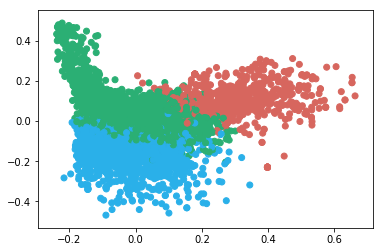

In [30]:
plt.scatter(coords[:, 0], coords[:, 1], c=colors)

In [31]:
print(clf.labels_)

[0 0 1 ... 2 1 1]


In [39]:
sum(clf.labels_ == 0)/clf.labels_.shape[0]

0.26297968397291194

In [40]:
sum(clf.labels_ == 1)/clf.labels_.shape[0]

0.6544864559819413

In [41]:
sum(clf.labels_ == 2)/clf.labels_.shape[0]

0.08253386004514672

In [45]:
labels = pd.Series(clf.labels_, name = 'labels')

In [50]:
dataset = pd.concat([dataset, labels],axis = 1)

In [52]:
dataset = dataset[['labels','Manual Label']]

In [56]:
dataset['maped_labs']= dataset['Manual Label'].map({'Escalation':2,'Others':1,'Status':0})

In [58]:
acc = 0
counter = 0
for i in range(len(dataset)):
    ans = dataset.maped_labs.iloc[i]
    guess = dataset.labels.iloc[i]
    if guess == ans:
        acc+= 1
    counter+=1

In [60]:
acc/counter

0.5447876992523628